**All python libraries used**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

**Dataset**

In [2]:
# loading dataset

df = pd.read_csv('final_dataset.csv')

In [3]:
df.head()

time  Global_active_power  Global_reactive_power  \
0  2007-01-01 00:00:00             2.537017               0.092217   
1  2007-01-01 02:00:00             2.562000               0.098383   
2  2007-01-01 04:00:00             2.475983               0.094917   
3  2007-01-01 06:00:00             2.451500               0.096500   
4  2007-01-01 08:00:00             2.793933               0.072850   

      Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0  241.228917         10.486667             0.0        0.291667   
1  243.232917         10.470000             0.0        0.300000   
2  242.402417         10.130000             0.0        0.291667   
3  240.768000         10.111667             0.0        0.275000   
4  240.461000         11.550000             0.0        0.025000   

   Sub_metering_3  Precipitation  CloudCover  Temperature  Snowfall      Wind  
0        0.000000   1.329846e-07    0.999695    286.43298       0.0  9.663516  
1        0.000000   2.353721e-07    0.556274    285.98602       0.0  8.988889  
2        0.000000   3.708734e-09    0.164459    284.50214       0.0  6.604268  
3        0.000000   0.000000e+00    0.197144    283.30905       0.0  7.486063  
4        6.016667   2.053049e-08    0.172791    282.31317       0.0  8.071110

In [4]:
# checking datatypes of dataset
df.dtypes

time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Precipitation            float64
CloudCover               float64
Temperature              float64
Snowfall                 float64
Wind                     float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17295 entries, 0 to 17294
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   17295 non-null  object 
 1   Global_active_power    16909 non-null  float64
 2   Global_reactive_power  16909 non-null  float64
 3   Voltage                16909 non-null  float64
 4   Global_intensity       16909 non-null  float64
 5   Sub_metering_1         16909 non-null  float64
 6   Sub_metering_2         16909 non-null  float64
 7   Sub_metering_3         16909 non-null  float64
 8   Precipitation          17295 non-null  float64
 9   CloudCover             17115 non-null  float64
 10  Temperature            17171 non-null  float64
 11  Snowfall               17295 non-null  float64
 12  Wind                   17295 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.7+ MB


In [6]:
#checking the statistical data  
df.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         16909.000000           16909.000000  16909.000000   
mean              1.083064               0.123663    240.833399   
std               0.820137               0.057417      2.852626   
min               0.154117               0.015650    226.213583   
25%               0.371067               0.085500    239.331833   
50%               0.836683               0.109983    240.982833   
75%               1.569467               0.143133    242.537333   
max               5.993667               0.672383    250.969750   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      16909.000000    16909.000000    16909.000000    16909.000000   
mean           4.591835        1.120353        1.288497        6.449795   
std            3.430781        2.992575        3.521110        6.622761   
min            0.718333        0.000000        0.000000        0.000000   
25%            1.636667        0.000000        0.233333        1.058333   
50%            3.568333        0.000000        0.325000        3.916667   
75%            6.586667        0.000000        0.508333       11.483333   
max           25.721667       40.116667       37.833333       20.760000   

       Precipitation    CloudCover   Temperature      Snowfall          Wind  
count   1.729500e+04  17115.000000  17171.000000  1.729500e+04  17295.000000  
mean    2.211388e-08      0.404926    284.581021  6.416254e-10      3.436134  
std     7.893967e-08      0.391305      7.160727  9.911886e-09      1.906328  
min     0.000000e+00      0.000000    261.535520  0.000000e+00      0.017494  
25%     0.000000e+00      0.019363    279.517425  0.000000e+00      2.026129  
50%     0.000000e+00      0.268768    284.625340  0.000000e+00      3.193988  
75%     5.629328e-09      0.835281    289.619400  0.000000e+00      4.591095  
max     1.986159e-06      1.000000    308.895200  4.953974e-07     13.569202

In [7]:
# checking shape
df.shape

(17295, 13)

In [8]:
#checking all the columns names
df.columns

Index(['time', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Precipitation', 'CloudCover', 'Temperature',
       'Snowfall', 'Wind'],
      dtype='object')

In [9]:
df.tail()

time  Global_active_power  Global_reactive_power  \
17290  2010-12-11 14:00:00             1.555850               0.168850   
17291  2010-12-11 16:00:00             1.908883               0.191567   
17292  2010-12-11 18:00:00             2.336417               0.105783   
17293  2010-12-11 20:00:00             1.434117               0.085317   
17294  2010-12-11 22:00:00             0.480200               0.063000   

          Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
17290  236.979333          6.818333           0.000        0.258333   
17291  233.290500          8.260000           0.000        0.608333   
17292  231.377417         10.098333           0.175        0.000000   
17293  235.275583          6.123333           8.300        0.775000   
17294  241.756083          1.990000           0.000        0.000000   

       Sub_metering_3  Precipitation  CloudCover  Temperature  Snowfall  \
17290       10.625000   0.000000e+00    1.000000    278.62927       0.0   
17291        5.958333   1.589457e-09    1.000000    278.68933       0.0   
17292        6.566667   1.298057e-08    1.000000    278.19742       0.0   
17293        5.033333   2.516640e-09    0.998108    277.87292       0.0   
17294        0.000000   1.986822e-09    0.907837    277.96870       0.0   

           Wind  
17290  1.694674  
17291  0.930473  
17292  0.700579  
17293  0.899321  
17294  1.093261

**Data Cleaning**

In [10]:
# checking the columns which have null values
droping_list_all=[]
for j in range(1,13):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
droping_list_all

[1, 2, 3, 4, 5, 6, 7, 9, 10]

In [11]:
# checking total number of null values 
df.isnull().sum()

time                       0
Global_active_power      386
Global_reactive_power    386
Voltage                  386
Global_intensity         386
Sub_metering_1           386
Sub_metering_2           386
Sub_metering_3           386
Precipitation              0
CloudCover               180
Temperature              124
Snowfall                   0
Wind                       0
dtype: int64

In [12]:
# filling the null values with mean
for j in range(1,13):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [13]:
# checking the null values after filling
df.isnull().sum()

time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Precipitation            0
CloudCover               0
Temperature              0
Snowfall                 0
Wind                     0
dtype: int64

In [14]:
# adding more columns to dataset to get better understanding

df['time'] = pd.to_datetime(df['time'], errors='coerce')

df['hour'] = df['time'].dt.hour
df['dayofweek'] = df['time'].dt.dayofweek
df['month'] = df['time'].dt.month
df['dayofyear'] = df['time'].dt.dayofyear
df['dayofmonth'] = df['time'].dt.day
df.set_index('time', inplace=True)

In [15]:

df.head()

Global_active_power  Global_reactive_power     Voltage  \
time                                                                          
2007-01-01 00:00:00             2.537017               0.092217  241.228917   
2007-01-01 02:00:00             2.562000               0.098383  243.232917   
2007-01-01 04:00:00             2.475983               0.094917  242.402417   
2007-01-01 06:00:00             2.451500               0.096500  240.768000   
2007-01-01 08:00:00             2.793933               0.072850  240.461000   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
time                                                                    
2007-01-01 00:00:00         10.486667             0.0        0.291667   
2007-01-01 02:00:00         10.470000             0.0        0.300000   
2007-01-01 04:00:00         10.130000             0.0        0.291667   
2007-01-01 06:00:00         10.111667             0.0        0.275000   
2007-01-01 08:00:00         11.550000             0.0        0.025000   

                     Sub_metering_3  Precipitation  CloudCover  Temperature  \
time                                                                          
2007-01-01 00:00:00        0.000000   1.329846e-07    0.999695    286.43298   
2007-01-01 02:00:00        0.000000   2.353721e-07    0.556274    285.98602   
2007-01-01 04:00:00        0.000000   3.708734e-09    0.164459    284.50214   
2007-01-01 06:00:00        0.000000   0.000000e+00    0.197144    283.30905   
2007-01-01 08:00:00        6.016667   2.053049e-08    0.172791    282.31317   

                     Snowfall      Wind  hour  dayofweek  month  dayofyear  \
time                                                                         
2007-01-01 00:00:00       0.0  9.663516     0          0      1          1   
2007-01-01 02:00:00       0.0  8.988889     2          0      1          1   
2007-01-01 04:00:00       0.0  6.604268     4          0      1          1   
2007-01-01 06:00:00       0.0  7.486063     6          0      1          1   
2007-01-01 08:00:00       0.0  8.071110     8          0      1          1   

                     dayofmonth  
time                             
2007-01-01 00:00:00           1  
2007-01-01 02:00:00           1  
2007-01-01 04:00:00           1  
2007-01-01 06:00:00           1  
2007-01-01 08:00:00           1

**Data Visualization**

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

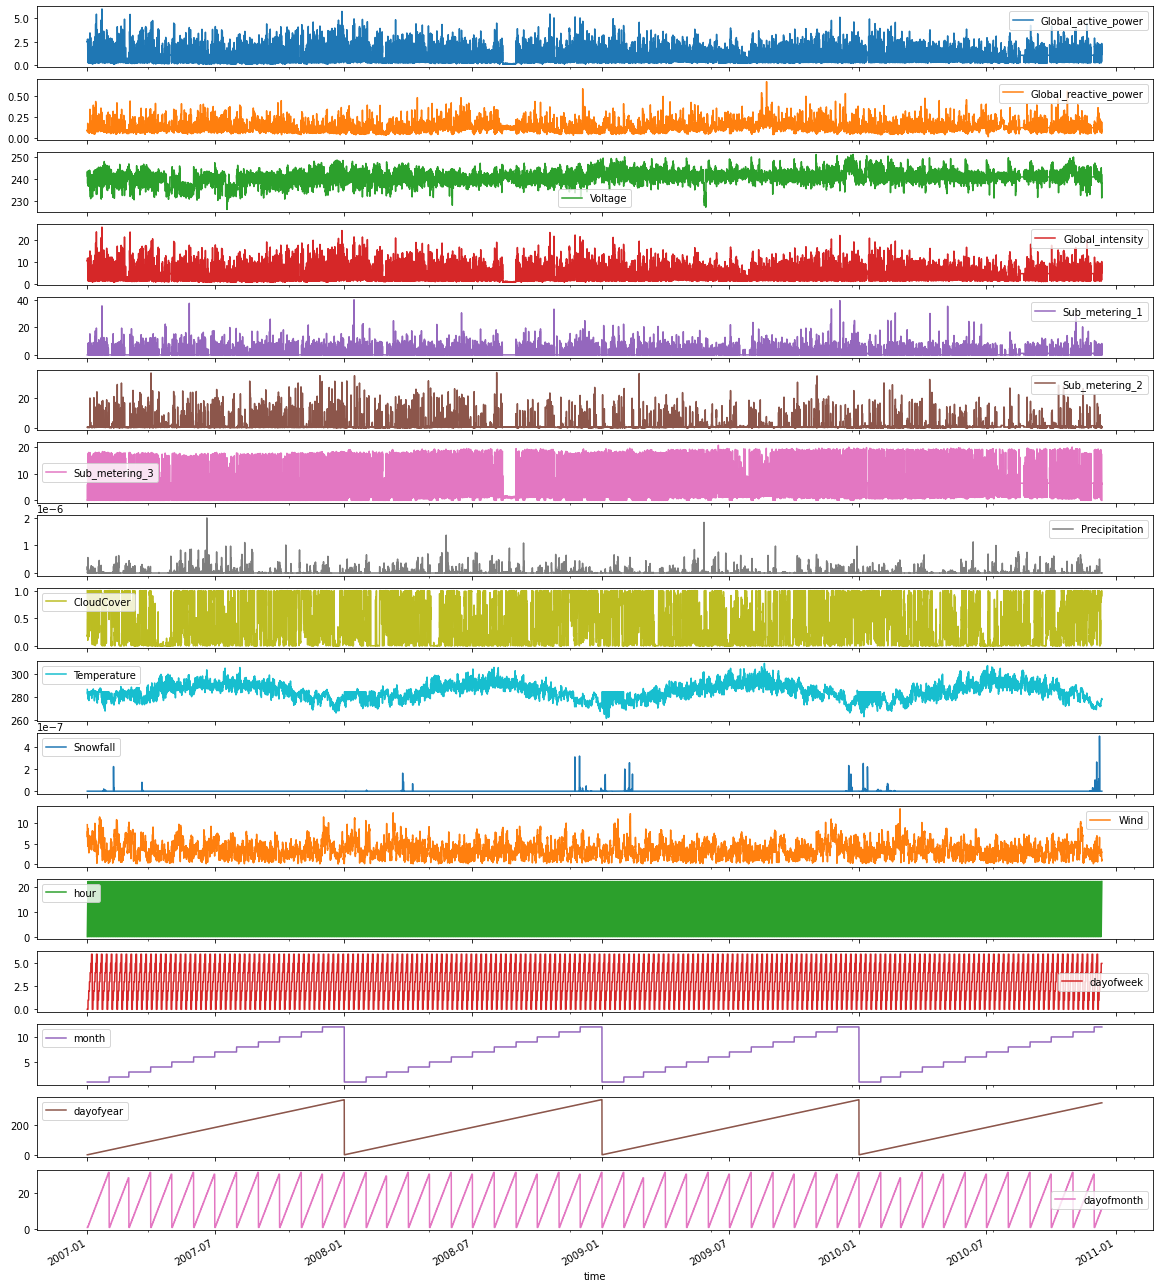

In [16]:
df.plot(subplots=True, figsize=(20, 25))

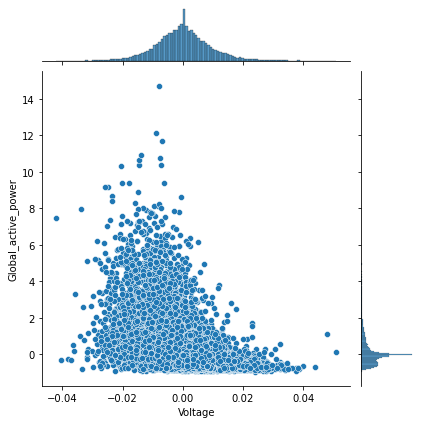

In [17]:
## The correlations between 'Voltage' and  'Global_active_power'
df=df[~df.index.duplicated()]
data_returns = df.pct_change()
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

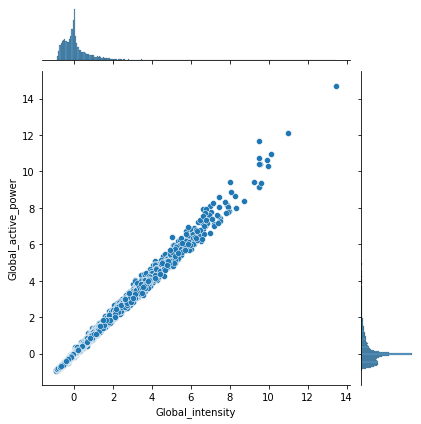

In [18]:
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  

plt.show()

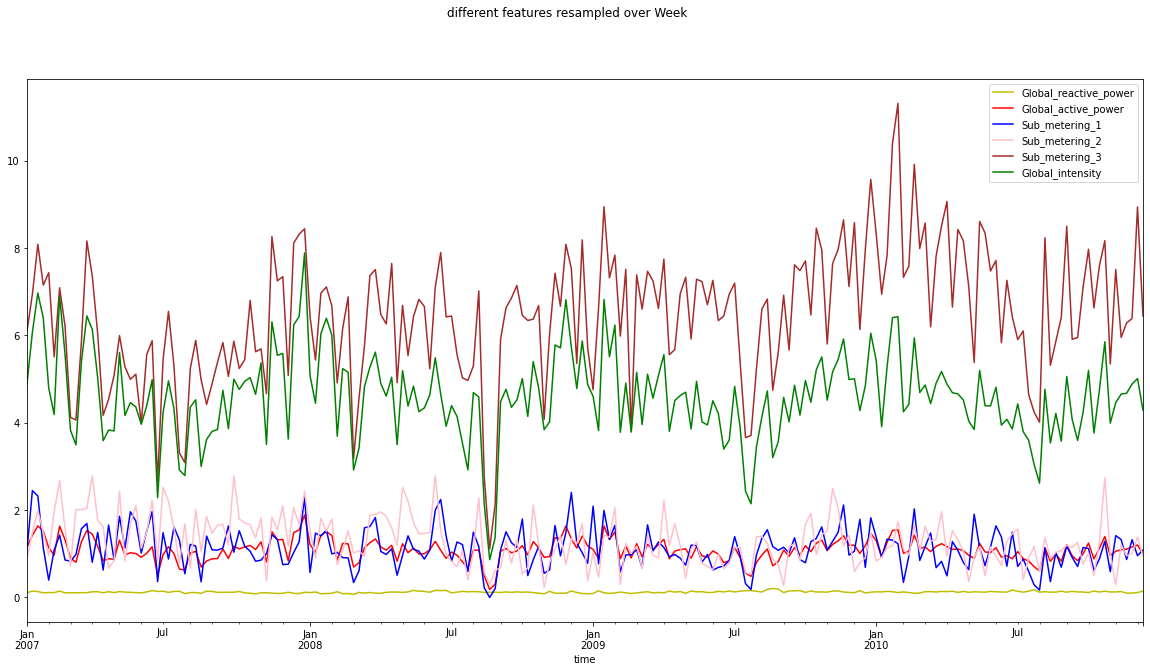

In [19]:
## resampling over week and computing mean
df.Global_reactive_power.resample('W').mean().plot(figsize=(20,10),color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(figsize=(20,10),color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(figsize=(20,10),color='b', legend=True)
df.Sub_metering_2.resample('W').mean().plot(figsize=(20,10),color='pink', legend=True)
df.Sub_metering_3.resample('W').mean().plot(figsize=(20,10),color='brown', legend=True)
df.Global_intensity.resample('W').mean().plot(figsize=(20,10),color='g', legend=True)
plt.suptitle("different features resampled over Week")
plt.show()

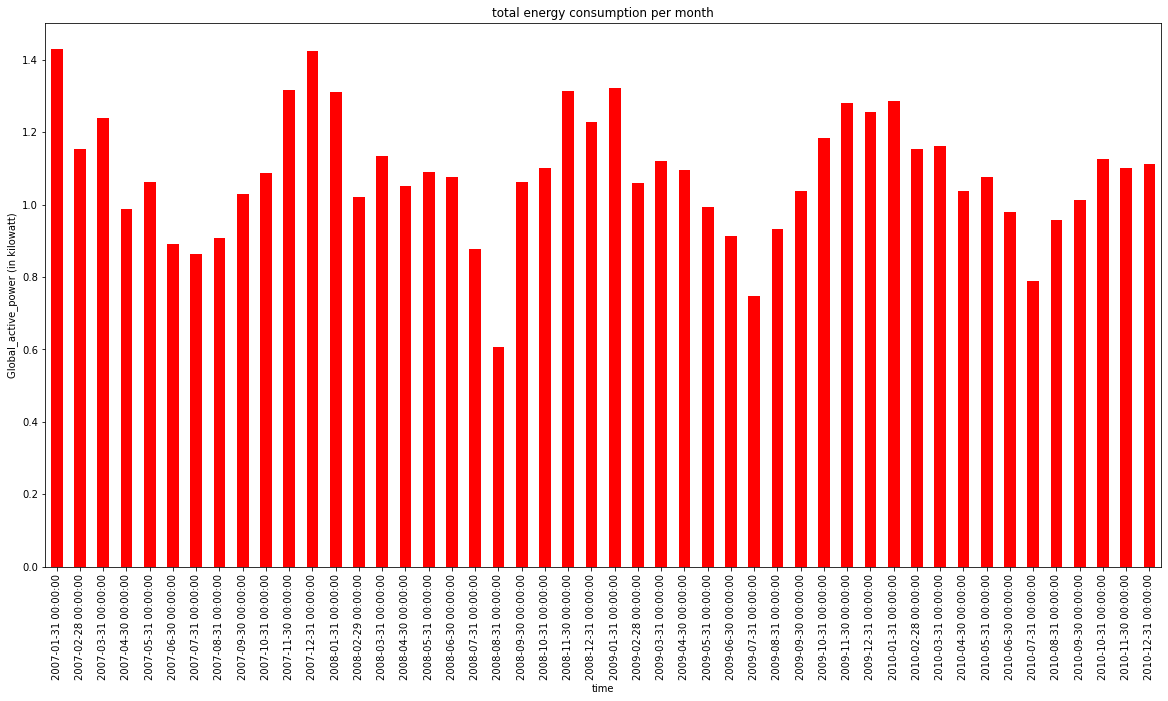

In [20]:
df['Global_active_power'].resample('M').mean().plot(kind='bar', color='red',figsize=(20,10))
plt.xticks(rotation=90)
plt.ylabel('Global_active_power (in kilowatt)')
plt.title('total energy consumption per month')
plt.show()

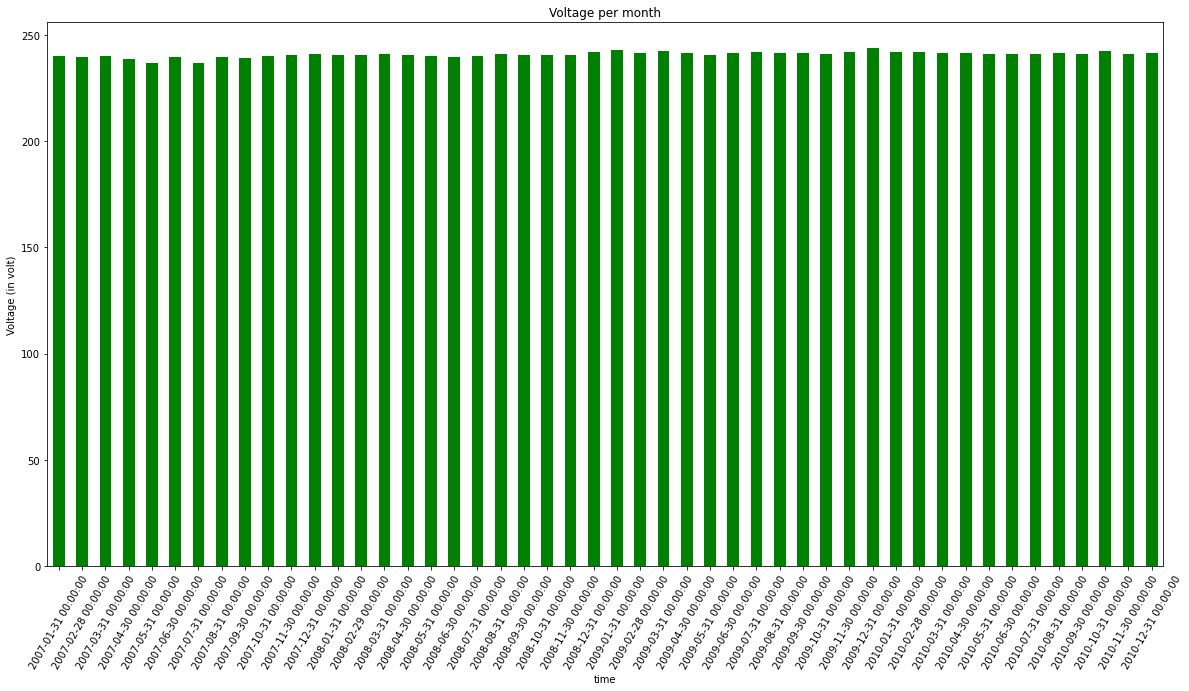

In [21]:
df['Voltage'].resample('M').mean().plot(kind='bar', color='Green',figsize=(20,10))
plt.xticks(rotation=60)
plt.ylabel('Voltage (in volt)')
plt.title('Voltage per month')
plt.show()

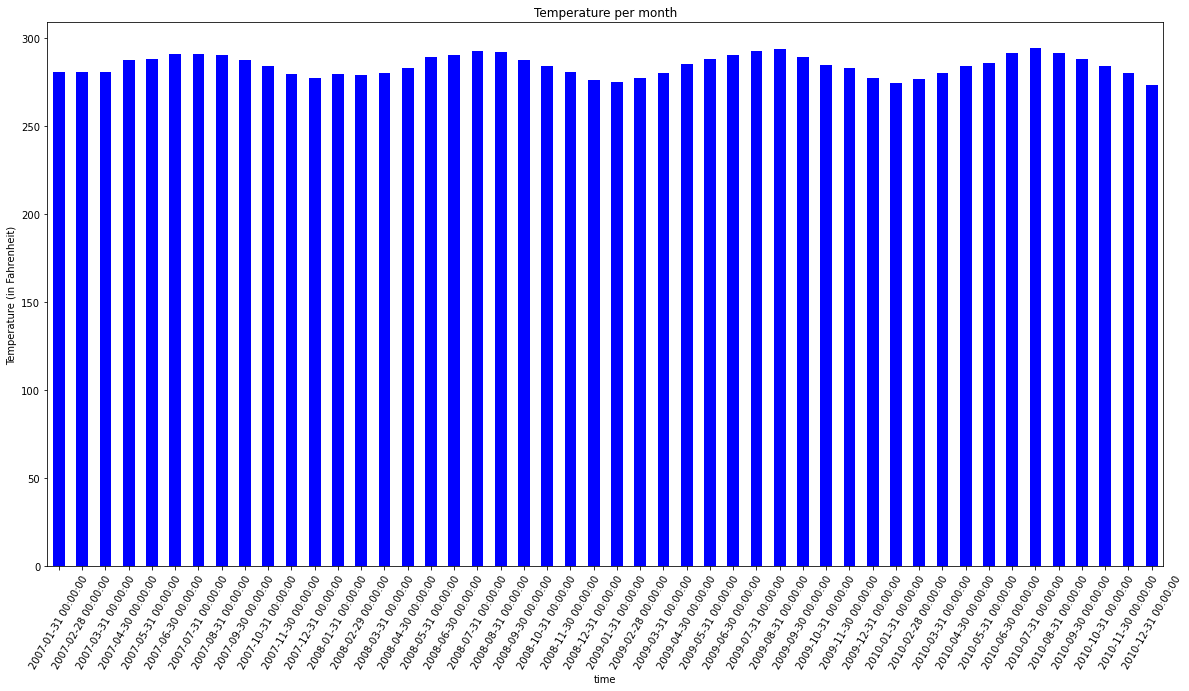

In [22]:
df['Temperature'].resample('M').mean().plot(kind='bar', color='Blue',figsize=(20,10))
plt.xticks(rotation=60)
plt.ylabel('Temperature (in Fahrenheit)')
plt.title('Temperature per month')
plt.show()

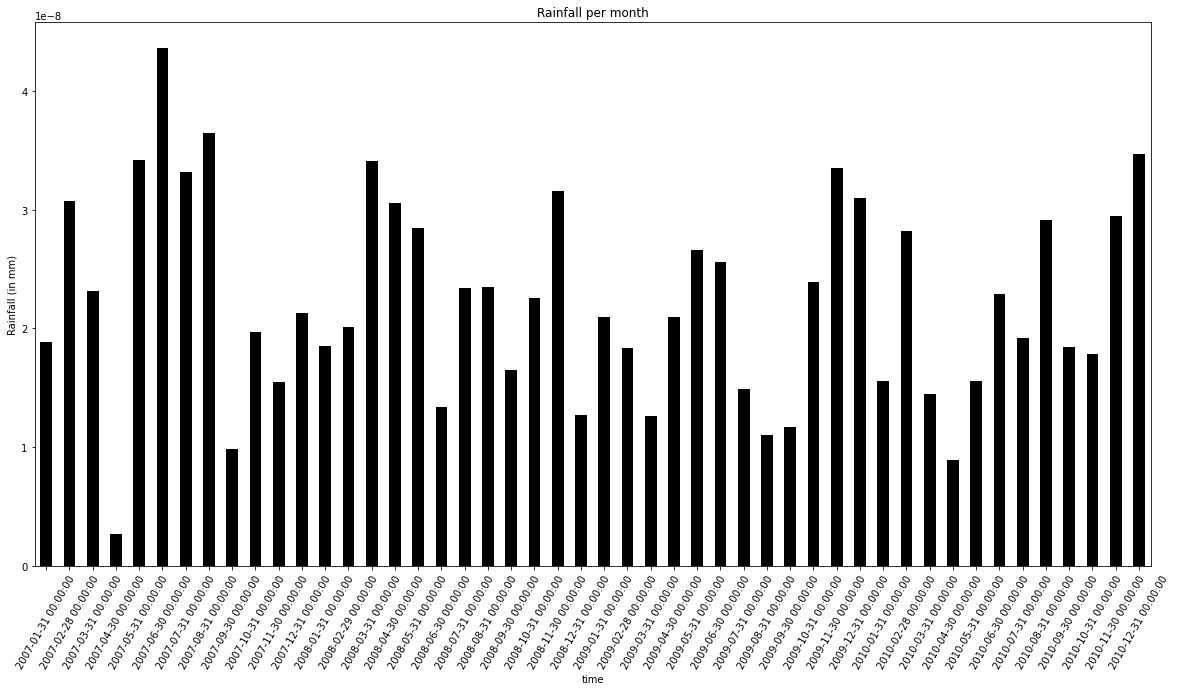

In [23]:
df['Precipitation'].resample('M').mean().plot(kind='bar', color='Black',figsize=(20,10))
plt.xticks(rotation=60)
plt.ylabel('Rainfall (in mm)')
plt.title('Rainfall per month')
plt.show()

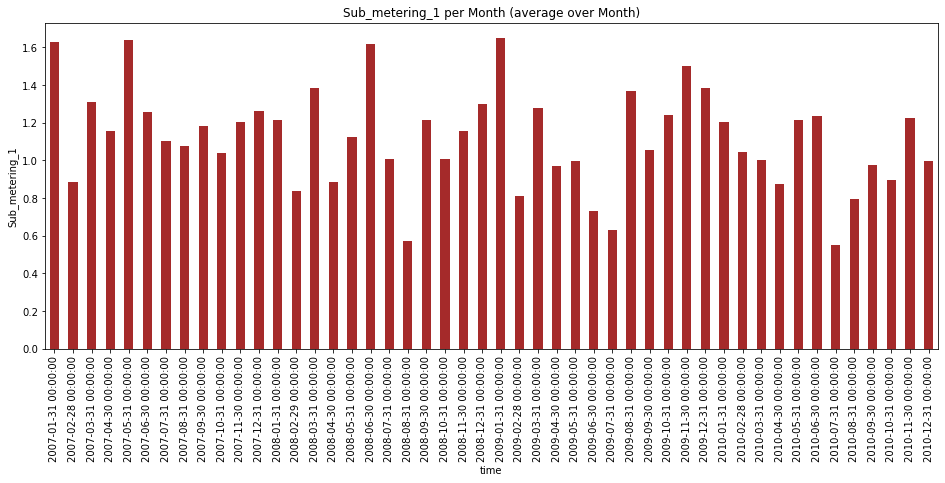

In [24]:
df['Sub_metering_1'].resample('M').mean().plot(figsize=(16,6),kind='bar', color='brown')
plt.xticks(rotation=90)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per Month (average over Month)')
plt.show()

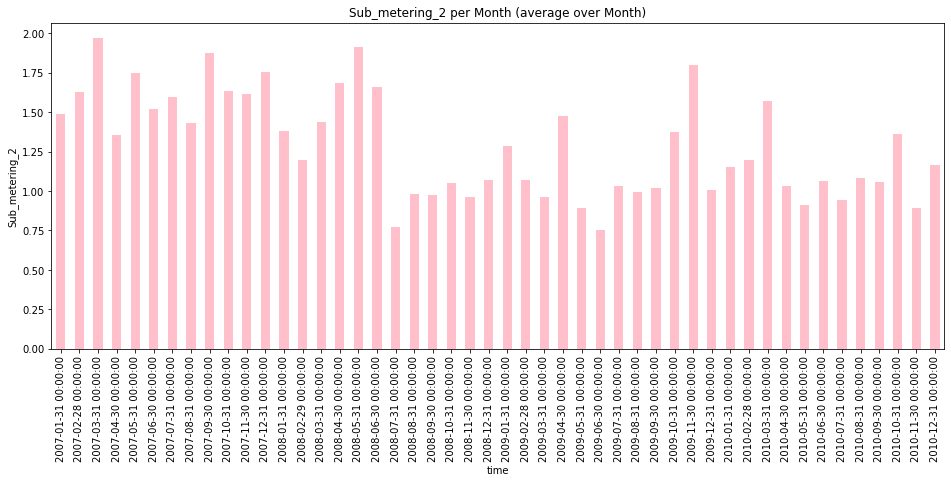

In [25]:
df['Sub_metering_2'].resample('M').mean().plot(figsize=(16,6),kind='bar', color='pink')
plt.xticks(rotation=90)
plt.ylabel('Sub_metering_2')
plt.title('Sub_metering_2 per Month (average over Month)')
plt.show()

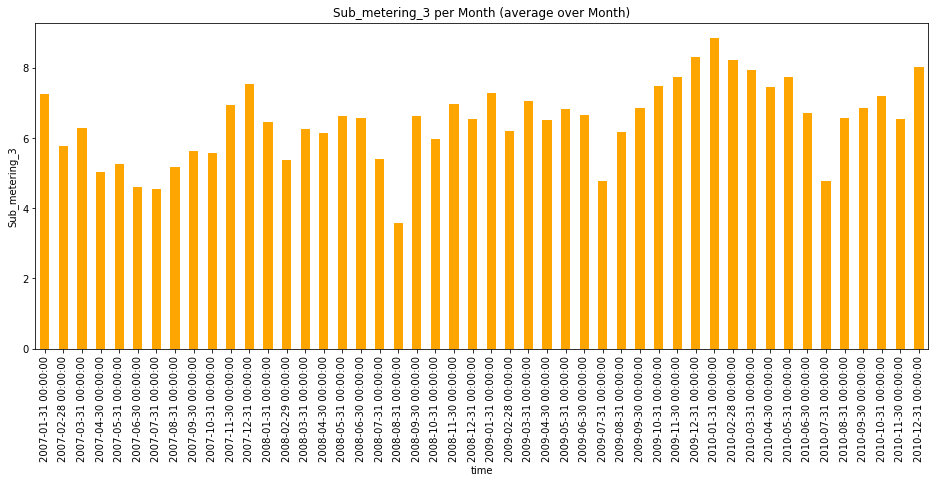

In [26]:
df['Sub_metering_3'].resample('M').mean().plot(figsize=(16,6),kind='bar', color='orange')
plt.xticks(rotation=90)
plt.ylabel('Sub_metering_3')
plt.title('Sub_metering_3 per Month (average over Month)')
plt.show()

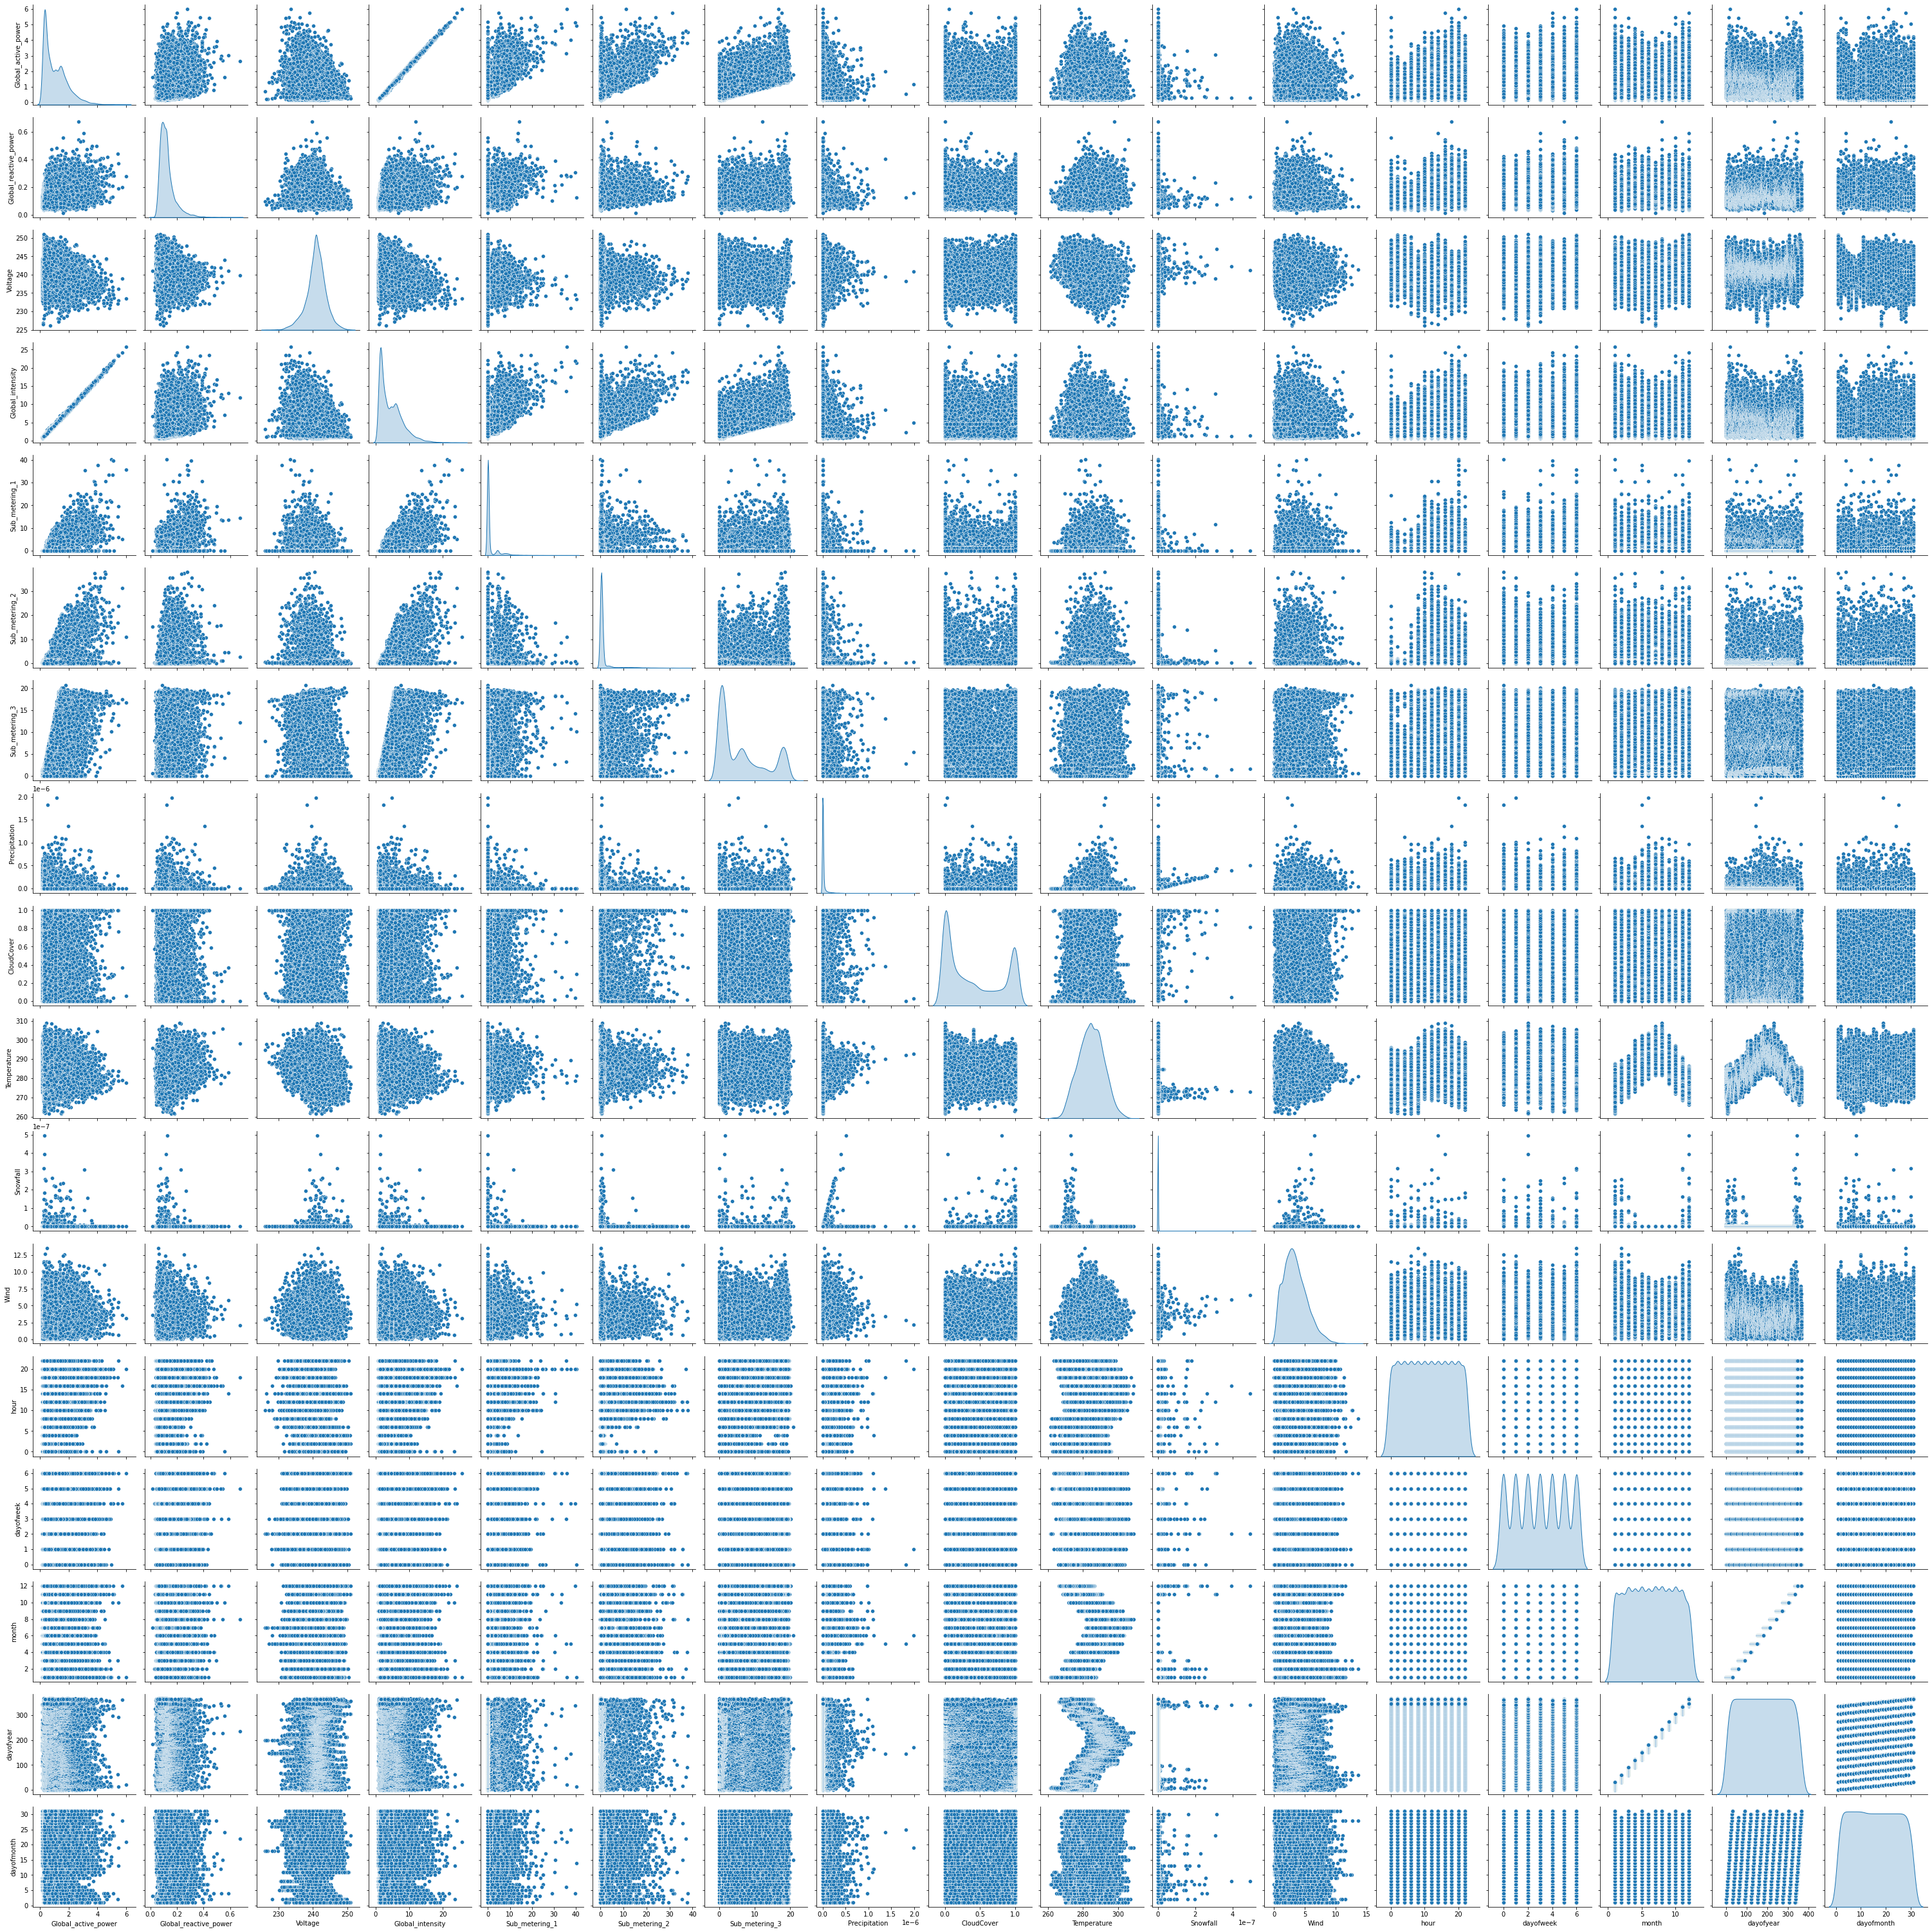

In [27]:
sns.pairplot(data=df, diag_kind='kde')

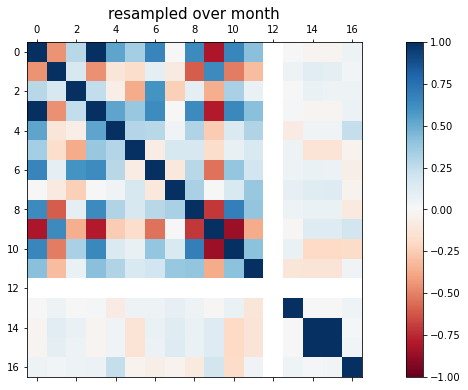

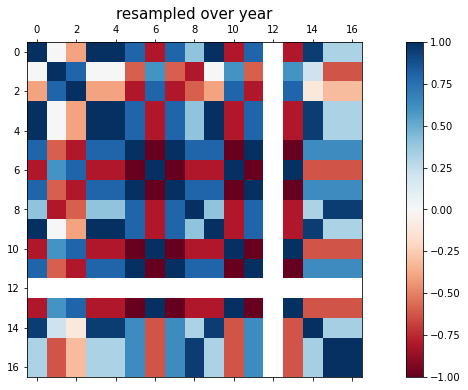

In [28]:
# Correlations of mean of features resampled over months

plt.figure(figsize=(16,6))
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='RdBu',fignum=1)
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)

# Correlations of mean of features resampled over months

plt.figure(figsize=(16,6))
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='RdBu',fignum=2)
plt.title('resampled over year', size=15)
plt.colorbar()

plt.show()


In [29]:
# correlation between features
df.corr()

Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.328096 -0.353538   
Global_reactive_power             0.328096               1.000000 -0.159076   
Voltage                          -0.353538              -0.159076  1.000000   
Global_intensity                  0.999454               0.344083 -0.368092   
Sub_metering_1                    0.529285               0.373484 -0.213968   
Sub_metering_2                    0.450368               0.285785 -0.162637   
Sub_metering_3                    0.705385               0.125257 -0.265218   
Precipitation                     0.009025               0.028601 -0.017371   
CloudCover                        0.057580              -0.066294 -0.011064   
Temperature                      -0.073321               0.240665 -0.236108   
Snowfall                          0.001897              -0.004960  0.025602   
Wind                              0.032638              -0.016371 -0.029931   
hour                              0.357027               0.248022 -0.191178   
dayofweek                         0.049079               0.083990 -0.000624   
month                            -0.010241               0.022003  0.041347   
dayofyear                        -0.012013               0.021986  0.041730   
dayofmonth                       -0.027117               0.009831 -0.000475   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.999454        0.529285        0.450368   
Global_reactive_power          0.344083        0.373484        0.285785   
Voltage                       -0.368092       -0.213968       -0.162637   
Global_intensity               1.000000        0.537589        0.457553   
Sub_metering_1                 0.537589        1.000000        0.155200   
Sub_metering_2                 0.457553        0.155200        1.000000   
Sub_metering_3                 0.696602        0.239883        0.153437   
Precipitation                  0.009747        0.012751        0.024581   
CloudCover                     0.056085        0.008774        0.030039   
Temperature                   -0.064175        0.027097        0.047692   
Snowfall                       0.001145        0.001962       -0.005651   
Wind                           0.032069        0.028402        0.031328   
hour                           0.359258        0.221477        0.141721   
dayofweek                      0.049981        0.067697        0.028662   
month                         -0.010955       -0.002791       -0.010121   
dayofyear                     -0.012751       -0.004180       -0.010201   
dayofmonth                    -0.027118       -0.016937       -0.000764   

                       Sub_metering_3  Precipitation  CloudCover  Temperature  \
Global_active_power          0.705385       0.009025    0.057580    -0.073321   
Global_reactive_power        0.125257       0.028601   -0.066294     0.240665   
Voltage                     -0.265218      -0.017371   -0.011064    -0.236108   
Global_intensity             0.696602       0.009747    0.056085    -0.064175   
Sub_metering_1               0.239883       0.012751    0.008774     0.027097   
Sub_metering_2               0.153437       0.024581    0.030039     0.047692   
Sub_metering_3               1.000000       0.003322    0.062382    -0.016347   
Precipitation                0.003322       1.000000    0.163334     0.034491   
CloudCover                   0.062382       0.163334    1.000000    -0.155303   
Temperature                 -0.016347       0.034491   -0.155303     1.000000   
Snowfall                     0.016316       0.129619    0.057065    -0.106359   
Wind                         0.070928       0.163115    0.234694     0.040400   
hour                         0.141672       0.014124   -0.020238     0.196720   
dayofweek                    0.008909      -0.016006   -0.020842     0.012462   
month                       -0.003

**Feature Selection Using Correlation HeatMap**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'Global_active_power'),
  Text(1.5, 0, 'Global_reactive_power'),
  Text(2.5, 0, 'Voltage'),
  Text(3.5, 0, 'Global_intensity'),
  Text(4.5, 0, 'Sub_metering_1'),
  Text(5.5, 0, 'Sub_metering_2'),
  Text(6.5, 0, 'Sub_metering_3'),
  Text(7.5, 0, 'Precipitation'),
  Text(8.5, 0, 'CloudCover'),
  Text(9.5, 0, 'Temperature'),
  Text(10.5, 0, 'Snowfall'),
  Text(11.5, 0, 'Wind'),
  Text(12.5, 0, 'hour'),
  Text(13.5, 0, 'dayofweek'),
  Text(14.5, 0, 'month'),
  Text(15.5, 0, 'dayofyear'),
  Text(16.5, 0, 'dayofmonth')])

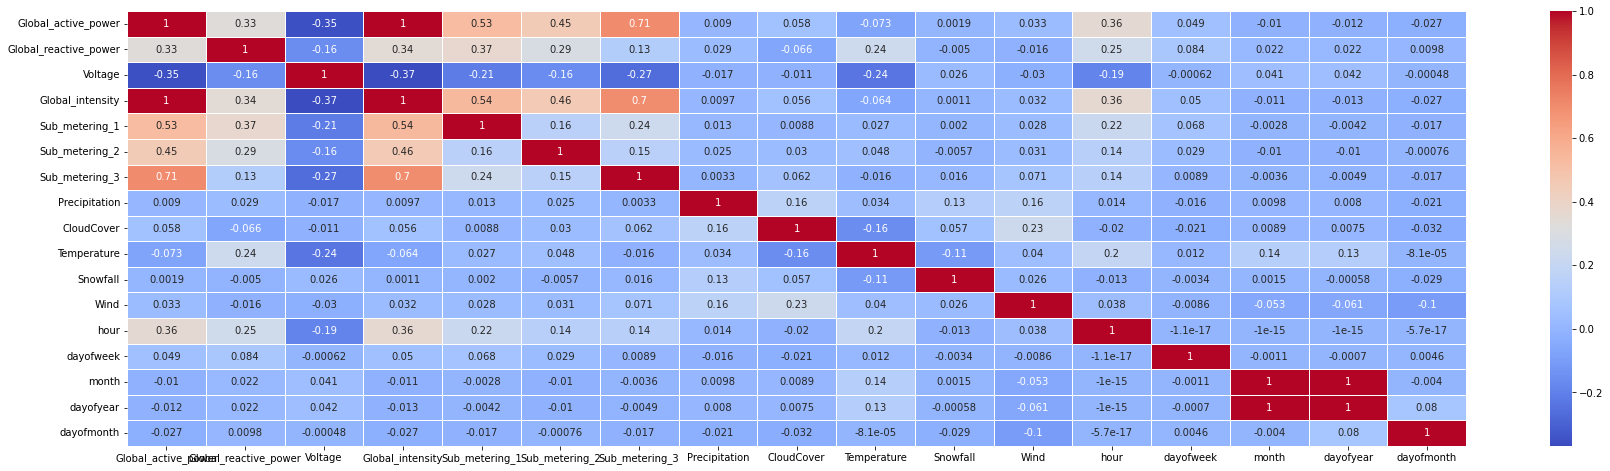

In [30]:
plt.figure(figsize = (30,8))
sns.heatmap(df.corr(), annot = True, linewidths=1, fmt=".2g", cmap= 'coolwarm') 
plt.xticks(rotation='horizontal')

**Time Lags**

In [31]:

def get_lag(data, col, lagtime):
    for i in range(1,lagtime+1):
        if len(pd.Series(col)) == 1:
            data[col+"_lag"+str(i)] = data[col].shift(i*15)
        else:
            for col_j in col:
                data[col_j+"_lag"+str(i)] = data[col_j].shift(i*15)
    return data

In [32]:
lagtime = 2

lag_feature = ['Global_reactive_power', 'hour','Global_intensity','Sub_metering_3','Sub_metering_1','Sub_metering_2']

new_df = get_lag(df, lag_feature, lagtime)

# adding time lags of 2 hours as features

new_df = get_lag(new_df, 'Global_active_power', 12)

new_df.drop(lag_feature,axis=1,inplace = True)

features_to_drop = ['Precipitation','CloudCover', 'Snowfall','Wind','Temperature','Voltage']

new_df.drop(features_to_drop,axis=1,inplace = True)


new_df.dropna(inplace=True)

In [33]:
new_df.head()

Global_active_power  dayofweek  month  dayofyear  \
time                                                                    
2007-01-16 00:00:00             0.343317          1      1         16   
2007-01-16 02:00:00             0.301083          1      1         16   
2007-01-16 04:00:00             0.596200          1      1         16   
2007-01-16 06:00:00             1.592500          1      1         16   
2007-01-16 08:00:00             0.986250          1      1         16   

                     dayofmonth  Global_reactive_power_lag1  hour_lag1  \
time                                                                     
2007-01-16 00:00:00          16                    0.267328       18.0   
2007-01-16 02:00:00          16                    0.173217       20.0   
2007-01-16 04:00:00          16                    0.107883       22.0   
2007-01-16 06:00:00          16                    0.090567        0.0   
2007-01-16 08:00:00          16                    0.100600        2.0   

                     Global_intensity_lag1  Sub_metering_3_lag1  \
time                                                              
2007-01-16 00:00:00              14.810084            16.672269   
2007-01-16 02:00:00              11.245000            16.991667   
2007-01-16 04:00:00               5.843333            17.783333   
2007-01-16 06:00:00               5.526667            17.816667   
2007-01-16 08:00:00               1.630000             1.591667   

                     Sub_metering_1_lag1  ...  Global_active_power_lag3  \
time                                      ...                             
2007-01-16 00:00:00                  0.0  ...                  0.847183   
2007-01-16 02:00:00                  0.0  ...                  2.098133   
2007-01-16 04:00:00                  0.0  ...                  3.081533   
2007-01-16 06:00:00                  0.0  ...                  2.774450   
2007-01-16 08:00:00                  0.0  ...                  2.188450   

                     Global_active_power_lag4  Global_active_power_lag5  \
time                                                                      
2007-01-16 00:00:00                  0.266850                  1.793867   
2007-01-16 02:00:00                  0.263983                  1.995600   
2007-01-16 04:00:00                  0.271817                  2.508017   
2007-01-16 06:00:00                  0.761267                  0.371150   
2007-01-16 08:00:00                  0.266817                  0.280883   

                     Global_active_power_lag6  Global_active_power_lag7  \
time                                                                      
2007-01-16 00:00:00                  1.211783                  0.439133   
2007-01-16 02:00:00                  1.504667                  0.716583   
2007-01-16 04:00:00                  0.984950                  1.304383   
2007-01-16 06:00:00                  0.191767                  0.376983   
2007-01-16 08:00:00                  0.177717                  0.361567   

                     Global_active_power_lag8  Global_active_power_lag9  \
time                                                                      
2007-01-16 00:00:00                  0.332167                  3.455267   
2007-01-16 02:00:00                  0.310017                  3.078600   
2007-01-16 04:00:00                  0.294783                  3.231350   
2007-01-16 06:00:00                  1.628717                  0.280217   
2007-01-16 08:00:00                  1.308300                  0.227733   

                     Global_active_power_lag10  Global_active_power_lag11  \
time                                                                        
2007-01-16 00:00:00                   0.272533                   2.638850   
2007-01-16 02:00:00                   0.277633                   2.675733   
2007-01-16 04:00:00                   0.781300                   1.423133   
2007-01-16 06:00:00            

**Standardization**

In [34]:


scaler = MinMaxScaler()

new_df = pd.DataFrame(scaler.fit_transform(new_df.values), columns=new_df.columns, index=new_df.index)
new_df.head()

Global_active_power  dayofweek  month  dayofyear  \
time                                                                    
2007-01-16 00:00:00             0.032400   0.166667    0.0   0.041096   
2007-01-16 02:00:00             0.025167   0.166667    0.0   0.041096   
2007-01-16 04:00:00             0.075705   0.166667    0.0   0.041096   
2007-01-16 06:00:00             0.246317   0.166667    0.0   0.041096   
2007-01-16 08:00:00             0.142500   0.166667    0.0   0.041096   

                     dayofmonth  Global_reactive_power_lag1  hour_lag1  \
time                                                                     
2007-01-16 00:00:00         0.5                    0.383227   0.818182   
2007-01-16 02:00:00         0.5                    0.239925   0.909091   
2007-01-16 04:00:00         0.5                    0.140443   1.000000   
2007-01-16 06:00:00         0.5                    0.114075   0.000000   
2007-01-16 08:00:00         0.5                    0.129352   0.090909   

                     Global_intensity_lag1  Sub_metering_3_lag1  \
time                                                              
2007-01-16 00:00:00               0.563595             0.803096   
2007-01-16 02:00:00               0.421011             0.818481   
2007-01-16 04:00:00               0.204973             0.856615   
2007-01-16 06:00:00               0.192308             0.858221   
2007-01-16 08:00:00               0.036462             0.076670   

                     Sub_metering_1_lag1  ...  Global_active_power_lag3  \
time                                      ...                             
2007-01-16 00:00:00                  0.0  ...                  0.118685   
2007-01-16 02:00:00                  0.0  ...                  0.332905   
2007-01-16 04:00:00                  0.0  ...                  0.501309   
2007-01-16 06:00:00                  0.0  ...                  0.448722   
2007-01-16 08:00:00                  0.0  ...                  0.348372   

                     Global_active_power_lag4  Global_active_power_lag5  \
time                                                                      
2007-01-16 00:00:00                  0.019305                  0.280801   
2007-01-16 02:00:00                  0.018814                  0.315347   
2007-01-16 04:00:00                  0.020156                  0.403096   
2007-01-16 06:00:00                  0.103972                  0.037166   
2007-01-16 08:00:00                  0.019299                  0.021708   

                     Global_active_power_lag6  Global_active_power_lag7  \
time                                                                      
2007-01-16 00:00:00                  0.181121                  0.048808   
2007-01-16 02:00:00                  0.231276                  0.096320   
2007-01-16 04:00:00                  0.142277                  0.196979   
2007-01-16 06:00:00                  0.006447                  0.038165   
2007-01-16 08:00:00                  0.004041                  0.035525   

                     Global_active_power_lag8  Global_active_power_lag9  \
time                                                                      
2007-01-16 00:00:00                  0.030490                  0.565309   
2007-01-16 02:00:00                  0.026697                  0.500806   
2007-01-16 04:00:00                  0.024089                  0.526964   
2007-01-16 06:00:00                  0.252519                  0.021594   
2007-01-16 08:00:00                  0.197649                  0.012607   

                     Global_active_power_lag10  Global_active_power_lag11  \
time                                                                        
2007-01-16 00:00:00                   0.020278                   0.425501   
2007-01-16 02:00:00                   0.021152                   0.431817   
2007-01-16 04:00:00                   0.107403                   0.217314   
2007-01-16 06:00:00            

**Spliting Dataset**

In [35]:
split_date =pd.to_datetime( '2009-1-1')
df_train = new_df.loc[new_df.index <= split_date].copy()
df_train.head()

Global_active_power  dayofweek  month  dayofyear  \
time                                                                    
2007-01-16 00:00:00             0.032400   0.166667    0.0   0.041096   
2007-01-16 02:00:00             0.025167   0.166667    0.0   0.041096   
2007-01-16 04:00:00             0.075705   0.166667    0.0   0.041096   
2007-01-16 06:00:00             0.246317   0.166667    0.0   0.041096   
2007-01-16 08:00:00             0.142500   0.166667    0.0   0.041096   

                     dayofmonth  Global_reactive_power_lag1  hour_lag1  \
time                                                                     
2007-01-16 00:00:00         0.5                    0.383227   0.818182   
2007-01-16 02:00:00         0.5                    0.239925   0.909091   
2007-01-16 04:00:00         0.5                    0.140443   1.000000   
2007-01-16 06:00:00         0.5                    0.114075   0.000000   
2007-01-16 08:00:00         0.5                    0.129352   0.090909   

                     Global_intensity_lag1  Sub_metering_3_lag1  \
time                                                              
2007-01-16 00:00:00               0.563595             0.803096   
2007-01-16 02:00:00               0.421011             0.818481   
2007-01-16 04:00:00               0.204973             0.856615   
2007-01-16 06:00:00               0.192308             0.858221   
2007-01-16 08:00:00               0.036462             0.076670   

                     Sub_metering_1_lag1  ...  Global_active_power_lag3  \
time                                      ...                             
2007-01-16 00:00:00                  0.0  ...                  0.118685   
2007-01-16 02:00:00                  0.0  ...                  0.332905   
2007-01-16 04:00:00                  0.0  ...                  0.501309   
2007-01-16 06:00:00                  0.0  ...                  0.448722   
2007-01-16 08:00:00                  0.0  ...                  0.348372   

                     Global_active_power_lag4  Global_active_power_lag5  \
time                                                                      
2007-01-16 00:00:00                  0.019305                  0.280801   
2007-01-16 02:00:00                  0.018814                  0.315347   
2007-01-16 04:00:00                  0.020156                  0.403096   
2007-01-16 06:00:00                  0.103972                  0.037166   
2007-01-16 08:00:00                  0.019299                  0.021708   

                     Global_active_power_lag6  Global_active_power_lag7  \
time                                                                      
2007-01-16 00:00:00                  0.181121                  0.048808   
2007-01-16 02:00:00                  0.231276                  0.096320   
2007-01-16 04:00:00                  0.142277                  0.196979   
2007-01-16 06:00:00                  0.006447                  0.038165   
2007-01-16 08:00:00                  0.004041                  0.035525   

                     Global_active_power_lag8  Global_active_power_lag9  \
time                                                                      
2007-01-16 00:00:00                  0.030490                  0.565309   
2007-01-16 02:00:00                  0.026697                  0.500806   
2007-01-16 04:00:00                  0.024089                  0.526964   
2007-01-16 06:00:00                  0.252519                  0.021594   
2007-01-16 08:00:00                  0.197649                  0.012607   

                     Global_active_power_lag10  Global_active_power_lag11  \
time                                                                        
2007-01-16 00:00:00                   0.020278                   0.425501   
2007-01-16 02:00:00                   0.021152                   0.431817   
2007-01-16 04:00:00                   0.107403                   0.217314   
2007-01-16 06:00:00            

In [36]:
df_test = pd.DataFrame(new_df.loc[new_df.index > split_date][:5000])

df_test.head()

Global_active_power  dayofweek  month  dayofyear  \
time                                                                    
2009-01-01 02:00:00             0.067953        0.5    0.0        0.0   
2009-01-01 04:00:00             0.066700        0.5    0.0        0.0   
2009-01-01 06:00:00             0.147297        0.5    0.0        0.0   
2009-01-01 08:00:00             0.065439        0.5    0.0        0.0   
2009-01-01 10:00:00             0.116091        0.5    0.0        0.0   

                     dayofmonth  Global_reactive_power_lag1  hour_lag1  \
time                                                                     
2009-01-01 02:00:00         0.0                    0.097046   0.909091   
2009-01-01 04:00:00         0.0                    0.087453   1.000000   
2009-01-01 06:00:00         0.0                    0.091031   0.000000   
2009-01-01 08:00:00         0.0                    0.094457   0.090909   
2009-01-01 10:00:00         0.0                    0.066795   0.181818   

                     Global_intensity_lag1  Sub_metering_3_lag1  \
time                                                              
2009-01-01 02:00:00               0.145114             0.565992   
2009-01-01 04:00:00               0.071324             0.000000   
2009-01-01 06:00:00               0.013665             0.000000   
2009-01-01 08:00:00               0.016464             0.000000   
2009-01-01 10:00:00               0.073790             0.286609   

                     Sub_metering_1_lag1  ...  Global_active_power_lag3  \
time                                      ...                             
2009-01-01 02:00:00                  0.0  ...                  0.097770   
2009-01-01 04:00:00                  0.0  ...                  0.090823   
2009-01-01 06:00:00                  0.0  ...                  0.205806   
2009-01-01 08:00:00                  0.0  ...                  0.215927   
2009-01-01 10:00:00                  0.0  ...                  0.043105   

                     Global_active_power_lag4  Global_active_power_lag5  \
time                                                                      
2009-01-01 02:00:00                  0.416687                  0.150611   
2009-01-01 04:00:00                  0.408767                  0.052413   
2009-01-01 06:00:00                  0.224769                  0.021968   
2009-01-01 08:00:00                  0.213832                  0.080152   
2009-01-01 10:00:00                  0.326712                  0.020615   

                     Global_active_power_lag6  Global_active_power_lag7  \
time                                                                      
2009-01-01 02:00:00                  0.069335                  0.259940   
2009-01-01 04:00:00                  0.304279                  0.121336   
2009-01-01 06:00:00                  0.133780                  0.190665   
2009-01-01 08:00:00                  0.051548                  0.353689   
2009-01-01 10:00:00                  0.051648                  0.080511   

                     Global_active_power_lag8  Global_active_power_lag9  \
time                                                                      
2009-01-01 02:00:00                  0.029640                  0.207884   
2009-01-01 04:00:00                  0.096554                  0.140296   
2009-01-01 06:00:00                  0.121020                  0.264190   
2009-01-01 08:00:00                  0.269499                  0.022810   
2009-01-01 10:00:00                  0.295454                  0.023132   

                     Global_active_power_lag10  Global_active_power_lag11  \
time                                                                        
2009-01-01 02:00:00                   0.068732                   0.340965   
2009-01-01 04:00:00                   0.242704                   0.205664   
2009-01-01 06:00:00                   0.329218                   0.204825   
2009-01-01 08:00:00            

**Train/Test**

In [37]:
X_train, y_train = df_train.iloc[:,1:],df_train.iloc[:,0]

X_test, y_test = df_test.iloc[:,1:],df_test.iloc[:,0]

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8593, 28)
(8593,)
(5000, 28)
(5000,)


**Random Forest Regressor**

In [39]:


from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=500,max_depth=200, random_state=1)  

reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=200, n_estimators=500, random_state=1)

In [40]:
pred_test = reg.predict(X_test)
pred_train = reg.predict(X_train)


In [41]:

 #(coefficient of determination) regression score function.

print("R2 Score: ",r2_score(y_train, pred_train))


R2 Score:  0.9172728675373308


In [42]:
 #The MSE indicates the average distance of the best fit regression line to the observed values.


print(" Mean Squared Error: ", mean_squared_error(y_train,pred_train))

 Mean Squared Error:  0.0018651695451798094


In [43]:

print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_train,pred_train)))

Root Mean Squared Error:  0.04318760869948473


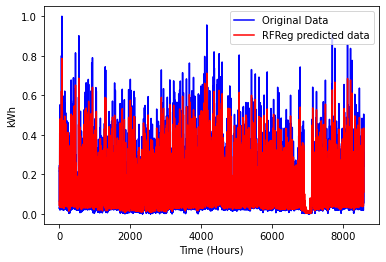

In [44]:
# Lets visualise our fit to the training data.
plt.plot(y_train.values.ravel(), color="b",label= 'Original Data')
plt.plot(pred_train, color ="red", label="RFReg predicted data")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')
plt.show()

**Support Vector Regressor**

In [45]:

reg = SVR(kernel='rbf', C=20, epsilon = 0.05)
reg.fit(X_train, y_train)

SVR(C=20, epsilon=0.05)

In [46]:
pred_test = reg.predict(X_test)
pred_train = reg.predict(X_train)

In [47]:

 #(coefficient of determination) regression score function.

print("R2 Score: ",r2_score(y_train, pred_train))

R2 Score:  0.7785231925291443


In [48]:
 #The MSE indicates the average distance of the best fit regression line to the observed values.


print(" Mean Squared Error: ", mean_squared_error(y_train,pred_train))

 Mean Squared Error:  0.004993425783792291


In [49]:

print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_train,pred_train)))

Root Mean Squared Error:  0.07066417609929582


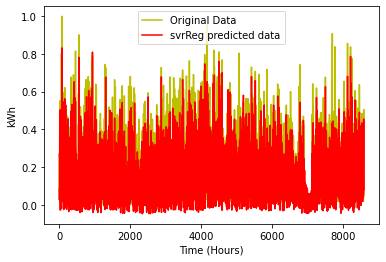

In [50]:
plt.plot(y_train.values.ravel(), color="y",label= 'Original Data')
plt.plot(pred_train, color ="red", label="svrReg predicted data")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')
plt.show()

**K Neighbors Regressor**

In [51]:

reg = KNeighborsRegressor(n_neighbors=2, weights='uniform')
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [52]:
pred_test = reg.predict(X_test)
pred_train = reg.predict(X_train)

In [53]:

 #(coefficient of determination) regression score function.

print("R2 Score: ",r2_score(y_train, pred_train))

R2 Score:  0.7044879108732659


In [54]:
 #The MSE indicates the average distance of the best fit regression line to the observed values.


print(" Mean Squared Error: ", mean_squared_error(y_train,pred_train))

 Mean Squared Error:  0.0066626284806906326


In [55]:

print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_train,pred_train)))

Root Mean Squared Error:  0.08162492560909708


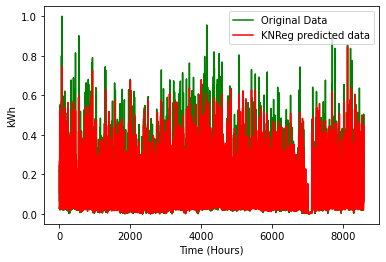

In [56]:
plt.plot(y_train.values.ravel(), color="g",label= 'Original Data')
plt.plot(pred_train, color ="red", label="KNReg predicted data")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')
plt.show()

**Multi-layer Perceptron Regressor**

In [57]:



reg = MLPRegressor(random_state=2, max_iter=1500,activation='relu',solver='lbfgs').fit(X_train, y_train)

reg.fit(X_train, y_train)

MLPRegressor(max_iter=1500, random_state=2, solver='lbfgs')

In [58]:
pred_test = reg.predict(X_test)
pred_train = reg.predict(X_train)

In [59]:

 #(coefficient of determination) regression score function.

print("R2 Score: ",r2_score(y_train, pred_train))

R2 Score:  0.6139217699023893


In [60]:
 #The MSE indicates the average distance of the best fit regression line to the observed values.


print(" Mean Squared Error: ", mean_squared_error(y_train,pred_train))

 Mean Squared Error:  0.008704536654403367


In [61]:

print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_train,pred_train)))

Root Mean Squared Error:  0.09329810638165904


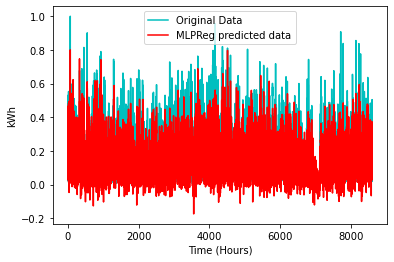

In [62]:
plt.plot(y_train.values.ravel(), color="c",label= 'Original Data')
plt.plot(pred_train, color ="red", label="MLPReg predicted data")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')
plt.show()

**Final Result**

In [63]:
# predicting Global active power
df_test['Prediction'] = pred_test
df_all = pd.concat([df_test, df_train], sort=False)
df_all.head()

Global_active_power  dayofweek  month  dayofyear  \
time                                                                    
2009-01-01 02:00:00             0.067953        0.5    0.0        0.0   
2009-01-01 04:00:00             0.066700        0.5    0.0        0.0   
2009-01-01 06:00:00             0.147297        0.5    0.0        0.0   
2009-01-01 08:00:00             0.065439        0.5    0.0        0.0   
2009-01-01 10:00:00             0.116091        0.5    0.0        0.0   

                     dayofmonth  Global_reactive_power_lag1  hour_lag1  \
time                                                                     
2009-01-01 02:00:00         0.0                    0.097046   0.909091   
2009-01-01 04:00:00         0.0                    0.087453   1.000000   
2009-01-01 06:00:00         0.0                    0.091031   0.000000   
2009-01-01 08:00:00         0.0                    0.094457   0.090909   
2009-01-01 10:00:00         0.0                    0.066795   0.181818   

                     Global_intensity_lag1  Sub_metering_3_lag1  \
time                                                              
2009-01-01 02:00:00               0.145114             0.565992   
2009-01-01 04:00:00               0.071324             0.000000   
2009-01-01 06:00:00               0.013665             0.000000   
2009-01-01 08:00:00               0.016464             0.000000   
2009-01-01 10:00:00               0.073790             0.286609   

                     Sub_metering_1_lag1  ...  Global_active_power_lag4  \
time                                      ...                             
2009-01-01 02:00:00                  0.0  ...                  0.416687   
2009-01-01 04:00:00                  0.0  ...                  0.408767   
2009-01-01 06:00:00                  0.0  ...                  0.224769   
2009-01-01 08:00:00                  0.0  ...                  0.213832   
2009-01-01 10:00:00                  0.0  ...                  0.326712   

                     Global_active_power_lag5  Global_active_power_lag6  \
time                                                                      
2009-01-01 02:00:00                  0.150611                  0.069335   
2009-01-01 04:00:00                  0.052413                  0.304279   
2009-01-01 06:00:00                  0.021968                  0.133780   
2009-01-01 08:00:00                  0.080152                  0.051548   
2009-01-01 10:00:00                  0.020615                  0.051648   

                     Global_active_power_lag7  Global_active_power_lag8  \
time                                                                      
2009-01-01 02:00:00                  0.259940                  0.029640   
2009-01-01 04:00:00                  0.121336                  0.096554   
2009-01-01 06:00:00                  0.190665                  0.121020   
2009-01-01 08:00:00                  0.353689                  0.269499   
2009-01-01 10:00:00                  0.080511                  0.295454   

                     Global_active_power_lag9  Global_active_power_lag10  \
time                                                                       
2009-01-01 02:00:00                  0.207884                   0.068732   
2009-01-01 04:00:00                  0.140296                   0.242704   
2009-01-01 06:00:00                  0.264190                   0.329218   
2009-01-01 08:00:00                  0.022810                   0.422319   
2009-01-01 10:00:00                  0.023132                   0.220131   

                     Global_active_power_lag11  Global_active_power_lag12  \
time                                                                        
2009-01-01 02:00:00                   0.340965                   0.033464   
2009-01-01 04:00:00                   0.205664                   0.028638   
2009-01-01 06:00:00                   0.204825                   0.214069   
2009-01-01 08:00:00     

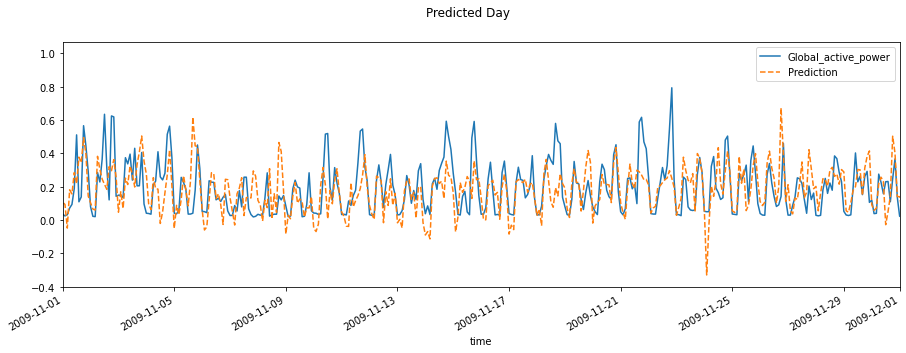

In [64]:
# ploting graph actual vs prediction result.
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['Global_active_power','Prediction']].plot(ax=ax,style=['-','--'])
ax.set_xbound(lower='11-1-2009', upper='12-1-2009')
plot = plt.suptitle('Predicted Day')
plt.show()


In [65]:
# checking MSE of prediction
np.sqrt(mean_squared_error(df_test['Prediction'], df_test['Global_active_power']))

0.13178808169784492